# Nearest-neighbor classification

In this script, we investigate some properties of the nearest-neighbor classifier with 2-D datasets. We are also 
interested in finding out how the classification results are related to the Voronoi diagram commonly used in computer 
vision and spatial statistics. 

This classification method is probably the most intuitive one. Having a dataset made of observations X 
belonging to several classes, we assign the class k to a new observation x when it is closest to the 
observation $X_{k}$, i.e. 

<blockquote>  
$k = \underset{i}{\mathrm{argmin}} \|x-X_{i}\| $
</blockquote> 
                                   
There are several ways (or metrics) to compute the distance between $X$ and $x$ but the euclidean distance, 
used in this script, is the most popular one. 


In [1]:
print(__doc__)

# Author: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: BSD

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors, cm

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

import seaborn as sns
sns.set()

# Used for reproductibility of the results
np.random.seed(42)

Automatically created module for IPython interactive environment


## Data normalization
This function will be used below to generate the classification examples.

In [2]:
def normalize_dataset(X, nbins):
    X = StandardScaler().fit_transform(X)
    x_min = 1.1 * X[:,0].min()
    x_max = 1.1 * X[:,0].max()
    y_min = 1.1 * X[:,1].min()
    y_max = 1.1 * X[:,1].max()

    # Generate a spatial grid where the PDF will be evaluated locally.
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nbins), np.linspace(y_min, y_max, nbins))
    Xgrid = np.c_[xx.ravel(), yy.ravel()]
    
    return (X, Xgrid, xx, yy, x_min, x_max, y_min, y_max)

# What do you get when you cross a dataset containing individual classes with nearest-neighbor classification?

Generate a small dataset containing as many classes as the number of data points

In [3]:
npts = 10
X = np.random.rand(npts, 2)
y = range(0,npts)

# Number of spatial bins used in each spatial direction
nbins = 500

# Normalize dataset
(X, Xgrid, xx, yy, x_min, x_max, y_min, y_max) = normalize_dataset(X, nbins)


Nearest-neighbor classification over the grid

In [4]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
C_KNN = clf.predict(Xgrid)
C_KNN = C_KNN.reshape(xx.shape)

Generate a colormap with has many colors as the number of data points 

In [5]:
NUM_COLORS = npts

colors = []
cm = plt.get_cmap('jet')
for i in range(NUM_COLORS):
    colors.append(cm(1.*i/NUM_COLORS))  # color will now be an RGBA tuple
    
cm_dim = ListedColormap(colors)


### Display classification results

The first panel in the figure below shows the influence zone of each data point. 

The second panel shows the Voronoi diagram corresponding to the dataset. Each pixel in a given polygon is closest 
to the data point inside it. The orange markers are the vertices of the polygons, i.e. the locations where their edges meet. 

The third panel shows the superposition of the first two, without the vertices for clarity. Hence, each 
and every Voronoi cell is the influence zone of the interior data point.


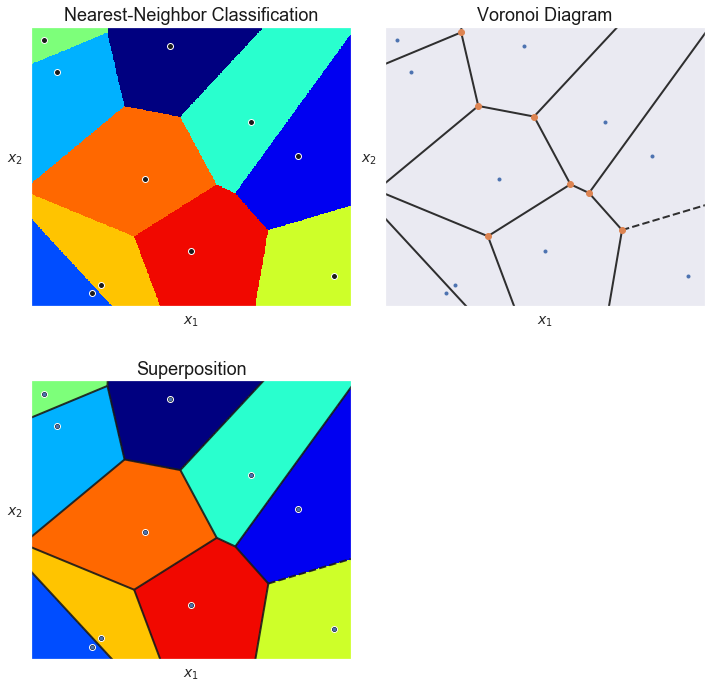

In [6]:
fig = plt.figure(figsize=(10, 10))

# Nearest-Neighbor classification results
ax = fig.add_subplot(221, aspect='equal')
ax.pcolormesh(xx, yy, C_KNN, cmap=cm_dim, zorder=0) 
ax.scatter(X[:, 0], X[:, 1], c='k', edgecolors='w')
ax.set_title('Nearest-Neighbor Classification', fontsize=18, color='k')
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xlabel('$x_{1}$', fontsize=14)
ax.set_ylabel('$x_{2}$', fontsize=14, rotation=0)
ax.xaxis.set_label_coords(0.5, -0.03) 
ax.yaxis.set_label_coords(-0.05, 0.5)  
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Voronoi Tesselation
ax = fig.add_subplot(222, aspect='equal')
vor = Voronoi(X)
fig = voronoi_plot_2d(vor, line_colors='k',line_width=2, line_alpha=0.9, zorder=10, ax=ax)
ax.set_title('Voronoi Diagram', fontsize=18, color='k')
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xlabel('$x_{1}$', fontsize=14)
ax.set_ylabel('$x_{2}$', fontsize=14, rotation=0)
ax.xaxis.set_label_coords(0.5, -0.03) 
ax.yaxis.set_label_coords(-0.05, 0.5) 
ax.grid(False)
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Superposition of clsssification results and tesselation
ax = fig.add_subplot(223, aspect='equal')
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='k',line_width=2, line_alpha=0.9, zorder=10, ax=ax)
ax.pcolormesh(xx, yy, C_KNN, cmap=cm_dim, zorder=0) 
ax.scatter(X[:, 0], X[:, 1], c='k', edgecolors='w')
ax.set_title('Superposition', fontsize=18, color='k')
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xlabel('$x_{1}$', fontsize=14)
ax.set_ylabel('$x_{2}$', fontsize=14, rotation=0)
ax.xaxis.set_label_coords(0.5, -0.03) 
ax.yaxis.set_label_coords(-0.05, 0.5) 
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()

plt.savefig('Nearest_neighbor_classification_and_Voronoi_diagram_1.png')
plt.savefig('Nearest_neighbor_classification_and_Voronoi_diagram_1.pdf')

# How is the Voronoi diagram related to the overall classification?

Generate a dataset made of objects of two classes

In [7]:
npts = 60
nc = np.array((npts/2, npts/2), dtype=int)

X0,y0 = np.random.rand(nc[0], 2), np.zeros((nc[0],), dtype=int)
X1,y1 = np.random.rand(nc[1], 2), np.ones((nc[1],), dtype=int)
X = np.r_[X0, X1]
y = np.r_[y0, y1]

# Normalize the dataset
(X, Xgrid, xx, yy, x_min, x_max, y_min, y_max) = normalize_dataset(X, nbins)


Nearest-neighbor classification over the grid

In [8]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
C_KNN = clf.predict(Xgrid)
C_KNN = C_KNN.reshape(xx.shape)


### Display classification results

The figure shows that the influence zone of a given class is made by the union of all the Vororoi cells containing 
data points belonging to that class.  

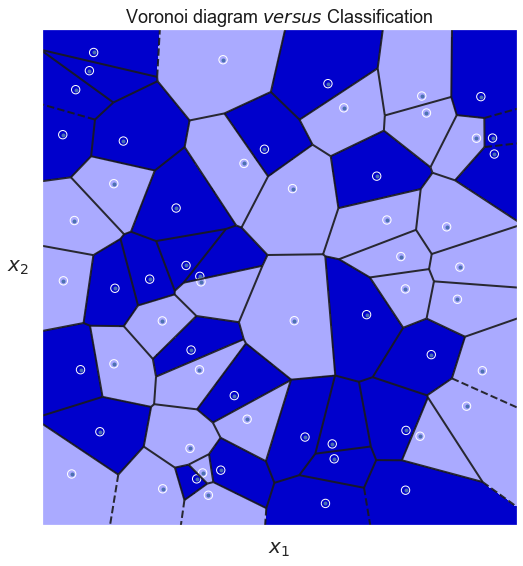

In [9]:
cm_dim = ListedColormap(['#0000CC', '#AAAAFF'])
cm_bright = ListedColormap(['#0000CC', '#AAAAFF'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, aspect='equal')

# Voronoi tesselation
vor = Voronoi(X)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='k',line_width=2, line_alpha=0.9, zorder=10, ax=ax)

# Classification results
ax.pcolormesh(xx, yy, C_KNN, cmap=cm_dim, zorder=0) 
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='w', s=70)

ax.set_title('Voronoi diagram $\it{versus}$ Classification', fontsize=18, color='k')
ax.set_xlim([x_min,x_max])
ax.set_ylim([y_min,y_max])
ax.set_xlabel('$x_{1}$', fontsize=20)
ax.set_ylabel('$x_{2}$', fontsize=20, rotation=0)
ax.xaxis.set_label_coords(0.5, -0.03) 
ax.yaxis.set_label_coords(-0.05, 0.5) 
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

fig.tight_layout()

plt.savefig('Nearest_neighbor_classification_and_Voronoi_diagram_2.png')
plt.savefig('Nearest_neighbor_classification_and_Voronoi_diagram_2.pdf')